# Decision Tree Classification

## Objective

Understand how decision trees split data using impurity measures
(Gini impurity and entropy) and how model complexity affects
bias and variance.

We will:

- Define impurity measures mathematically
- Train a classification tree
- Visualize tree structure
- Plot decision boundaries
- Analyze bias–variance behavior

## Mathematical Foundations

Decision trees recursively partition the feature space by selecting
splits that reduce impurity.

### Gini Impurity

Gini impurity measures class mixing within a node:

G = 1 - Σ p_k²

where p_k is the proportion of class k in the node.

Minimum value: 0 (pure node)

---

### Entropy

Entropy measures uncertainty:

H = - Σ p_k log₂(p_k)

Higher entropy → more disorder.

---

### Information Gain

A split is chosen to maximize impurity reduction:

IG = Impurity(parent) - Weighted average Impurity(children)

The algorithm greedily selects the split with maximum Information Gain.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


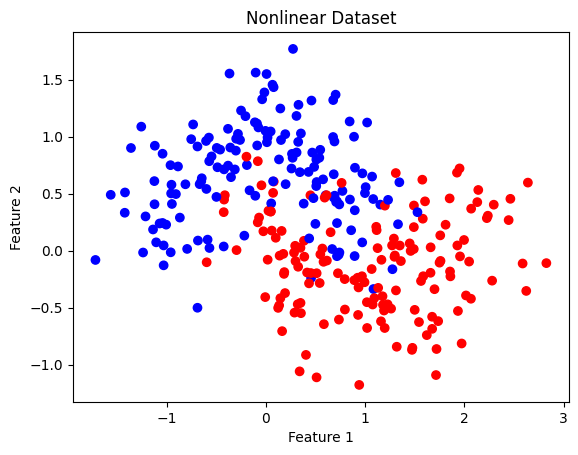

In [3]:
X, y = make_moons(
    n_samples=300,
    noise = 0.3,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.title("Nonlinear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Interpretation

The dataset is nonlinearly separable.
This makes it a good example for evaluating
tree-based models, which can model nonlinear boundaries.

In [5]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

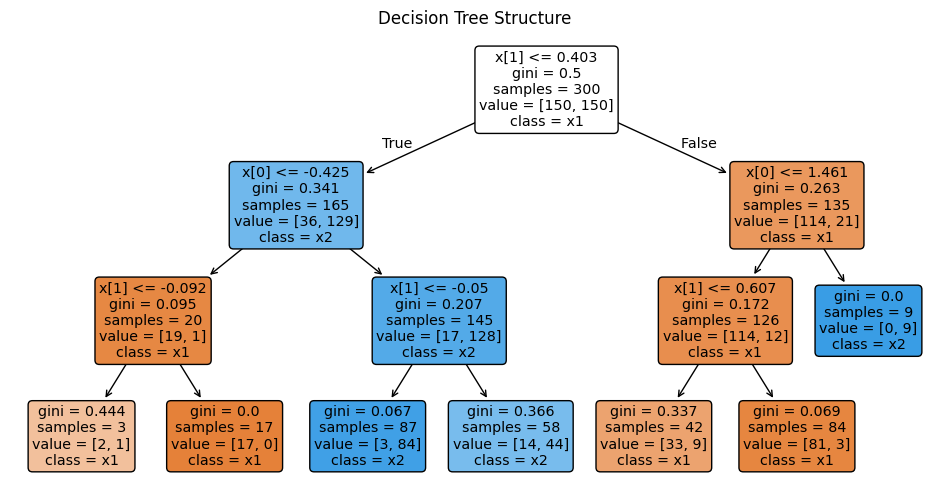

In [6]:
plt.figure(figsize=(12, 6))
plot_tree(tree, filled=True, rounded=True, class_names=["x1", "x2"])
plt.title("Decision Tree Structure")
plt.show()

### Interpretation

Each internal node contains:

- Feature threshold
- Impurity (Gini by default)
- Number of samples
- Class distribution

Trees split one feature at a time,
creating axis-aligned decision boundaries.

In [12]:
def plot_decision_boundary(model, X, y, ax=None, title="Decision Boundary", xlabel="Feature 1", y_label="Feature 2"):
    if ax is None:
        fig, ax = plt.subplots()

    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    )

    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid)
    y_pred = y_pred.reshape(x0.shape)

    ax.contourf(x0, x1, y_pred, alpha=0.2, cmap="bwr")
    ax.contour(x0, x1, y_pred, levels=[0.5], colors="k", linestyles="--")
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="bwr")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return ax

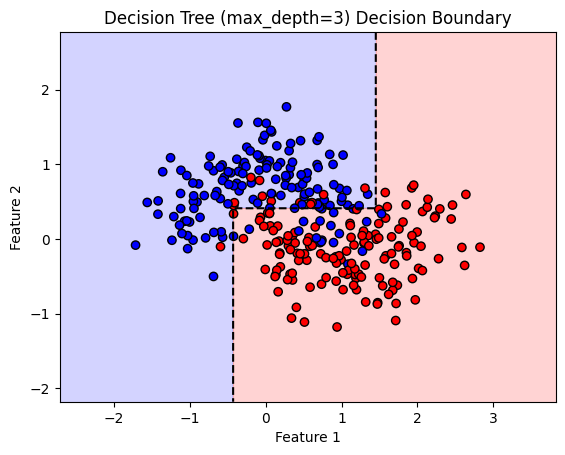

In [13]:
fig, ax = plt.subplots()
plot_decision_boundary(tree, X, y, ax=ax, title="Decision Tree (max_depth=3) Decision Boundary")
plt.show()

## Bias–Variance Interpretation

- Shallow trees → high bias (underfitting)
- Deep trees → low bias but high variance (overfitting)

Decision trees are unstable learners.
Small changes in training data can produce
different tree structures.

This high variance motivates ensemble methods
such as Random Forest.

<Axes: title={'center': 'Deep Tree (Overfitting)'}, xlabel='Feature 1', ylabel='Feature 2'>

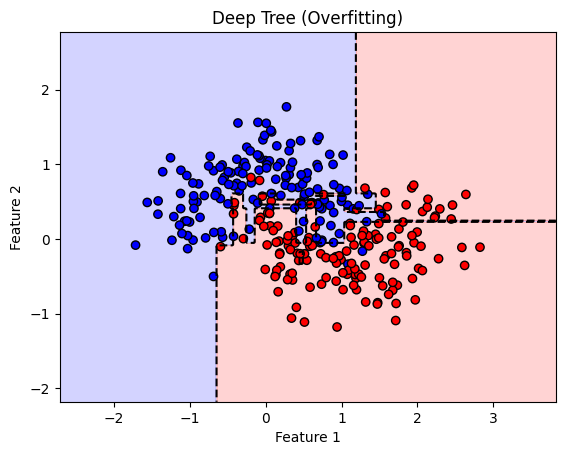

In [14]:
tree_deep = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_deep.fit(X, y)
plot_decision_boundary(tree_deep, X, y, title="Deep Tree (Overfitting)")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

tree.fit(X_train, y_train)

train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, tree.predict(X_test))

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8952380952380953
Test Accuracy: 0.9


## Engineering Takeaways

- Decision trees require no feature scaling.
- They handle nonlinear boundaries naturally.
- They are interpretable but unstable.
- Model complexity must be controlled via regularization.
- Ensemble methods stabilize tree predictions.